Učitavanje potrebnih biblioteka

In [769]:
import numpy as np
import matplotlib.pyplot as plt
import random

### Određivanje funkcija gustina verovatnoća raspodela

Definisanje parametara četiri normalne klase

In [731]:
# srednje vrednosti i kovarijaciono matrice sve cetiri klase
M1, S1 = [[0], [3]], [[1.1, 0], [0, 1.1]]
M2, S2 = [[2], [18]], [[1, 0], [0, 1]]
M3, S3 = [[15], [3]], [[0.55, 0], [0, 0.55]]
M4, S4 = [[14], [21]], [[0.6, 0], [0, 0.6]]   

Formiranje x i y ose prostora u kojima će biti analizirane date raspodele - njihove funkcije gustine verovatnoće (FGV)

In [732]:
x_1 = np.linspace(-5, 5, 100)           # x koordinate za prvu klasu
y_1 = np.linspace(-5, 15, 100)          # y koordinate za prvu klasu

x_2 = np.linspace(-10, 10, 100)         # x koordinate za drugu klasu
y_2 = np.linspace(10, 25, 100)          # y koordinate za drugu klasu

x_3 = np.linspace(10, 20, 100)          # x koordinate za trecu klasu
y_3 = np.linspace(-10, 10, 100)         # y koordinate za trecu klasu

x_4 = np.linspace(10, 25, 100)          # x koordinate za trecu klasu
y_4 = np.linspace(10, 30, 100)          # y koordinate za trecu klasu   

om1 = np.zeros((len(x_1), len(y_1)))    # fgv za prvu klasu
om2 = np.zeros((len(x_2), len(y_2)))    # fgv za drugu klasu
om3 = np.zeros((len(x_3), len(y_3)))    # fgv za trecu klasu
om4 = np.zeros((len(x_4), len(y_4)))    # fgv za trecu klasu

Određivanje FGV bimodalnih raspodela

In [733]:
# prolazak kroz sve tacke prostora i racunanje fgv za svaku
for i in range(len(x_1)):
    for j in range(len(y_1)):

        X = [[x_1[i]], [y_1[j]]]    # vektor sa x i y koordinatom tacke iz prve klase
        # racunanje fgv za prvu raspodelu
        om1[i, j] = 1/(2*np.pi*np.sqrt(np.linalg.det(S1)))*np.exp(-0.5*np.transpose(np.subtract(X, M1)) @ np.linalg.inv(S1) @ np.subtract(X, M1))

        X = [[x_2[i]], [y_2[j]]]   
        # racunanje fgv za drugu raspodelu
        om2[i, j] = 1/(2*np.pi*np.sqrt(np.linalg.det(S2)))*np.exp(-0.5*np.transpose(np.subtract(X, M2)) @ np.linalg.inv(S2) @ np.subtract(X, M2))

        X = [[x_3[i]], [y_3[j]]]
        # racunanje fgv za trecu raspodelu
        om3[i, j] = 1/(2*np.pi*np.sqrt(np.linalg.det(S3)))*np.exp(-0.5*np.transpose(np.subtract(X, M3)) @ np.linalg.inv(S3) @ np.subtract(X, M3))

        X = [[x_4[i]], [y_4[j]]]
        # racunanje fgv za trecu raspodelu
        om4[i, j] = 1/(2*np.pi*np.sqrt(np.linalg.det(S4)))*np.exp(-0.5*np.transpose(np.subtract(X, M4)) @ np.linalg.inv(S4) @ np.subtract(X, M4))
        

In [734]:
# formiranje grida za prikaz
x_1, y_1 = np.meshgrid(x_1, y_1)
x_2, y_2 = np.meshgrid(x_2, y_2)
x_3, y_3 = np.meshgrid(x_3, y_3)
x_4, y_4 = np.meshgrid(x_4, y_4)

Prikaz funkcija gustina verovatnoca za sve četiri klase

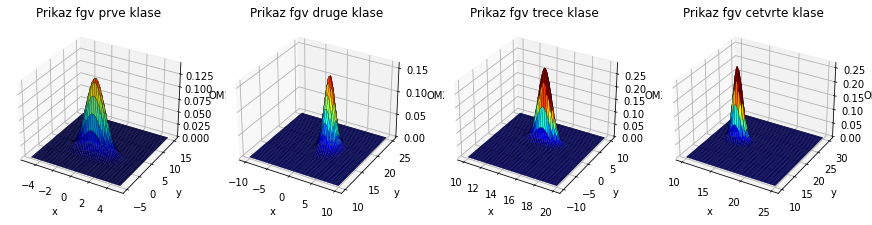

In [770]:
# formiranje boja za prikaz
my_col_1 = plt.cm.jet(om1.T*6)
my_col_2 = plt.cm.jet(om2.T*6)
my_col_3 = plt.cm.jet(om3.T*6)
my_col_4 = plt.cm.jet(om4.T*6)

# prikaz
fig, ax = plt.subplots(1, 4,
                       figsize=(15, 8),
                       layout='tight',
                       subplot_kw=dict(projection="3d"))
ax[0].plot_surface(x_1, y_1, om1.T, facecolors=my_col_1, ec='black', lw=0.2, shade=True)
ax[1].plot_surface(x_2, y_2, om2.T, facecolors=my_col_2, ec='black', lw=0.2, shade=False)
ax[2].plot_surface(x_3, y_3, om3.T, facecolors=my_col_3, ec='black', lw=0.2, shade=False) 
ax[3].plot_surface(x_4, y_4, om4.T, facecolors=my_col_4, ec='black', lw=0.2, shade=False)      

ax[0].set_xlabel('x'), ax[0].set_ylabel('y'), ax[0].set_zlabel('OM1') 
ax[1].set_xlabel('x'), ax[1].set_ylabel('y'), ax[1].set_zlabel('OM2')
ax[2].set_xlabel('x'), ax[2].set_ylabel('y'), ax[2].set_zlabel('OM3')
ax[3].set_xlabel('x'), ax[3].set_ylabel('y'), ax[3].set_zlabel('OM4')

ax[0].set_title('Prikaz fgv prve klase')
ax[1].set_title('Prikaz fgv druge klase')
ax[2].set_title('Prikaz fgv trece klase')
ax[3].set_title('Prikaz fgv cetvrte klase')

plt.show()

## 1) C-means klasterizacija

### a) Generisanje odbiraka transformacijom bojenja i njihov prikaz

Prvo je potrebno odrediti sopstvene vrednosti i spostvene vektore

In [736]:
# sopstvene vrednosti i sopstveni vektori kovarijacionih matrica
[F1, L1] = np.linalg.eig(S1)
[F2, L2] = np.linalg.eig(S2)
[F3, L3] = np.linalg.eig(S3)
[F4, L4] = np.linalg.eig(S4)

Određivanje transformacionih matrica

In [737]:
T1 = F1*(np.sign(L1)*abs(L1)**(1/2))   
T2 = F2*(np.sign(L2)*abs(L2)**(1/2))    
T3 = F3*(np.sign(L3)*abs(L3)**(1/2))    
T4 = F4*(np.sign(L4)*abs(L4)**(1/2))   

Generisanje po 500 odbiraka iz sve četiri klase

In [738]:
N = 500                             # broj odbiraka                     
odbirci_klasa_1 = np.zeros((2, N))  # matrica odbiraka za prvu klasu
odbirci_klasa_2 = np.zeros((2, N))  # matrica odbiraka za drugu klasu
odbirci_klasa_3 = np.zeros((2, N))  # matrica odbiraka za trecu klasu
odbirci_klasa_4 = np.zeros((2, N))  # matrica odbiraka za trecu klasu

for i in range(N):                  # generisanje odbiraka prve klase
    odbirci_klasa_1[:, i] = (T1 @ np.random.randn(2, 1) + M1).T
    odbirci_klasa_2[:, i] = (T2 @ np.random.randn(2, 1) + M2).T
    odbirci_klasa_3[:, i] = (T3 @ np.random.randn(2, 1) + M3).T
    odbirci_klasa_4[:, i] = (T4 @ np.random.randn(2, 1) + M4).T

Prikaz generisanih odbiraka i 2d FGVa za sve četiri klase

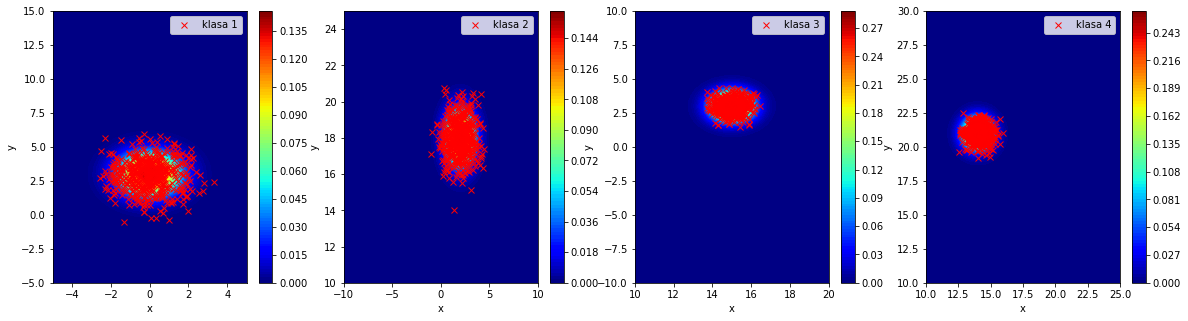

In [739]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.contourf(x_1, y_1, om1.T, 100, cmap='jet')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(odbirci_klasa_1[0, :], odbirci_klasa_1[1, :], 'x', label='klasa 1', color = 'red')
plt.legend()

plt.subplot(1, 4, 2)
plt.contourf(x_2, y_2, om2.T, 100, cmap='jet')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(odbirci_klasa_2[0, :], odbirci_klasa_2[1, :], 'x', label='klasa 2', color='red')
plt.legend()

plt.subplot(1, 4, 3)
plt.contourf(x_3, y_3, om3.T, 100, cmap='jet')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(odbirci_klasa_3[0, :], odbirci_klasa_3[1, :], 'x', label='klasa 3', color='red')
plt.legend()

plt.subplot(1, 4, 4)
plt.contourf(x_4, y_4, om4.T, 100, cmap='jet')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(odbirci_klasa_4[0, :], odbirci_klasa_4[1, :], 'x', label='klasa 4', color='red')
plt.legend()

plt.show()

Prikaz generisanih odbiraka na istom grafiku

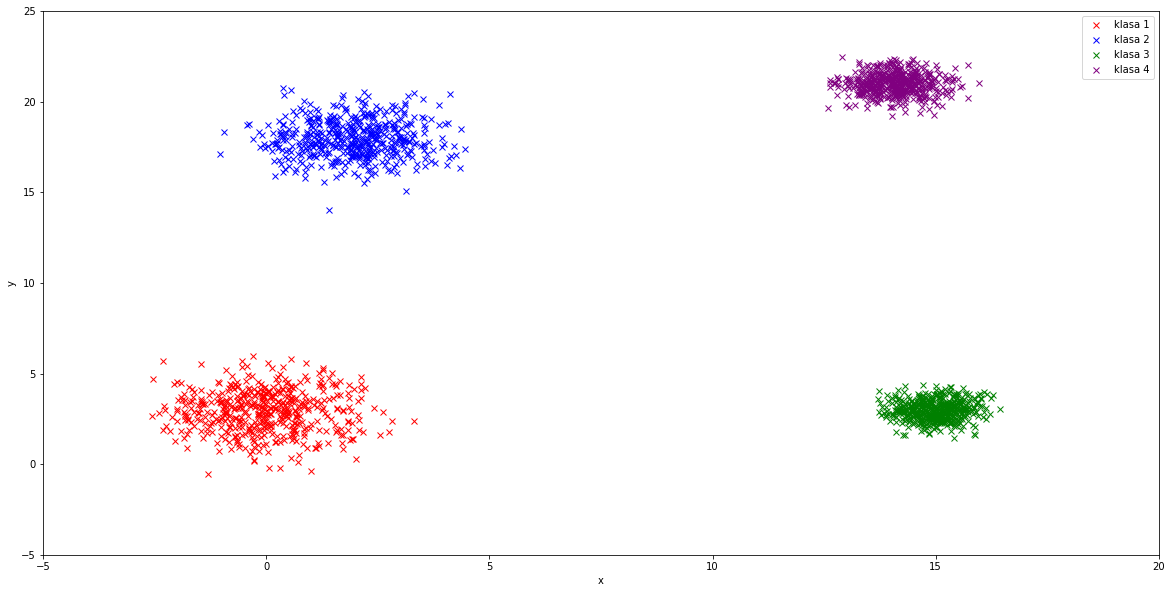

In [740]:
plt.figure(figsize=(20, 10))
plt.plot(odbirci_klasa_1[0, :], odbirci_klasa_1[1, :], 'x', label='klasa 1', color = 'red')
plt.plot(odbirci_klasa_2[0, :], odbirci_klasa_2[1, :], 'x', label='klasa 2', color='blue')
plt.plot(odbirci_klasa_3[0, :], odbirci_klasa_3[1, :], 'x', label='klasa 3', color='green')
plt.plot(odbirci_klasa_4[0, :], odbirci_klasa_4[1, :], 'x', label='klasa 4', color='purple')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-5, 20)
plt.ylim(-5, 25)
plt.show()

Na grafiku iznad, prikazani su odbirci 4 normalne raspodele labelirane drugim bojama (po pripadnosti klasama).  

### b) C-means klasterizacija

Sada je potrebno formirati ukupni niz odbiraka i njihovih labela.

In [741]:
odbirci = np.concatenate((odbirci_klasa_1, odbirci_klasa_2, odbirci_klasa_3, odbirci_klasa_4), axis=1)      # matrica odbiraka
labele = np.concatenate((np.zeros((1, N)), np.ones((1, N)), 2*np.ones((1, N)), 3*np.ones((1, N))), axis=1)  # matrica labela

Za klasterizacionu metodu izabrana je c-means klasterizacija.        
Ova metoda zahteva poznavanje broja klasa, a funkcioniše tako što se odbirci dodaju u najbližu. Početna klasterizacija je slučajna, a svaki sledeći put se računaju centri klastera i vrši ponovna preraspodela odbiraka.

In [742]:
def c_means(odbirci, L, ogranicenje=0, prikaz=True):
    """L - broj labela"""

    odbirci_x = odbirci[0, :]   # x koordinate odbiraka
    odbirci_y = odbirci[1, :]   # y koordinate odbiraka
    low_granica_x = min(odbirci_x)      # donja granica za x koordinate
    high_granica_x = max(odbirci_x)     # gornja granica za x koordinate
    low_granica_y = min(odbirci_y)      # donja granica za y koordinate
    high_granica_y = max(odbirci_y)     # gornja granica za y koordinate

    # inicijalizacija centara
    centri = np.zeros((odbirci.shape[0], L))
    for i in range(L):
        centri[:, i] = np.array([random.uniform(low_granica_x, high_granica_x), random.uniform(low_granica_y, high_granica_y)])
        centri1 = centri.copy()

    broj_iteracija = 0
    # iterativno racunanje centara
    while True:
        prethodni_centri = centri.copy()
        broj_iteracija += 1
        # racunanje rastojanja izmedju svakog odbirka i svakog centra
        rastojanja = np.zeros((odbirci.shape[1], L))
        for j in range(L):
            rastojanja[:, j] = np.linalg.norm(odbirci - centri[:, j].reshape(-1, 1), axis=0)

        # racunanje najblizeg centra za svaki odbirak
        najblizi_centar = np.argmin(rastojanja, axis=1)

        # racunanje novih centara
        for j in range(L):
            ulaz = 1
            for i in odbirci[:, np.where(najblizi_centar == j)[0]]:
                if len(i) == 0:
                    ulaz = 0
            if ulaz:
                centri[:, j] = np.mean(odbirci[:, np.where(najblizi_centar == j)[0]], axis=1)
            else:
                centri[:, j] = centri1[:, j]

        # provera da li su se centri promenili
        if np.allclose(prethodni_centri, centri):
            break
        # provera da li je dostignuto ogranicenje
        if broj_iteracija == ogranicenje:
            break

    # prikaz rezultata
    if prikaz:
        plt.figure(figsize=(20, 10))
        plt.plot(centri1[0, :], centri1[1, :], 'o', label='pocetni centri', color='gray', markersize=10)
        plt.plot(odbirci[0, np.where(najblizi_centar == 0)[0]], odbirci[1, np.where(najblizi_centar == 0)[0]], 'x', label='klasa 1', color = 'red')
        plt.plot(odbirci[0, np.where(najblizi_centar == 1)[0]], odbirci[1, np.where(najblizi_centar == 1)[0]], 'x', label='klasa 2', color='blue')
        plt.plot(odbirci[0, np.where(najblizi_centar == 2)[0]], odbirci[1, np.where(najblizi_centar == 2)[0]], 'x', label='klasa 3', color='green')
        plt.plot(odbirci[0, np.where(najblizi_centar == 3)[0]], odbirci[1, np.where(najblizi_centar == 3)[0]], 'x', label='klasa 4', color='purple')
        plt.plot(centri[0, :], centri[1, :], 'o', label='krajnji centri', color='black', markersize=10)
        plt.legend()
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

    return broj_iteracija


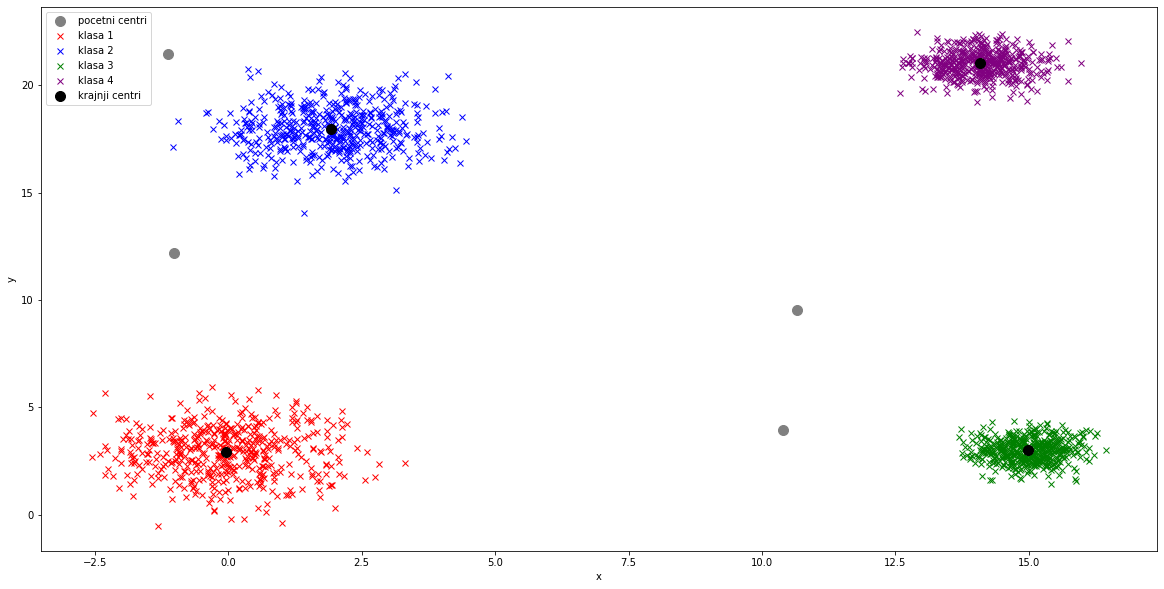

Broj iteracija:  3


In [743]:
broj_iteracija = c_means(odbirci, 4)
print('Broj iteracija: ', broj_iteracija)

Na grafiku iznad može se videti pripadnost odbiraka različitim klasama nakon ove nenadgledane metode učenja (c-means klasterizacije). Crne tačke predstavljaju centre klastera nakon klasterizacije, dok sive tačke predstavljaju dodeljene početne pozicije.

### c) Analiza osetljivosti algoritma na početnu klasterizaciju

Kako bi se testirala osetljivost algoritma na početnu klasterizaciju ograničen je dozvoljeni broj iteracija (na 3 iteracije, pošto su klase već dovoljno separabilne, pa nije potrebno previše odbiraka da bi došlo do konvergencije). Posmatrani su rezultati za različita pokretanja.

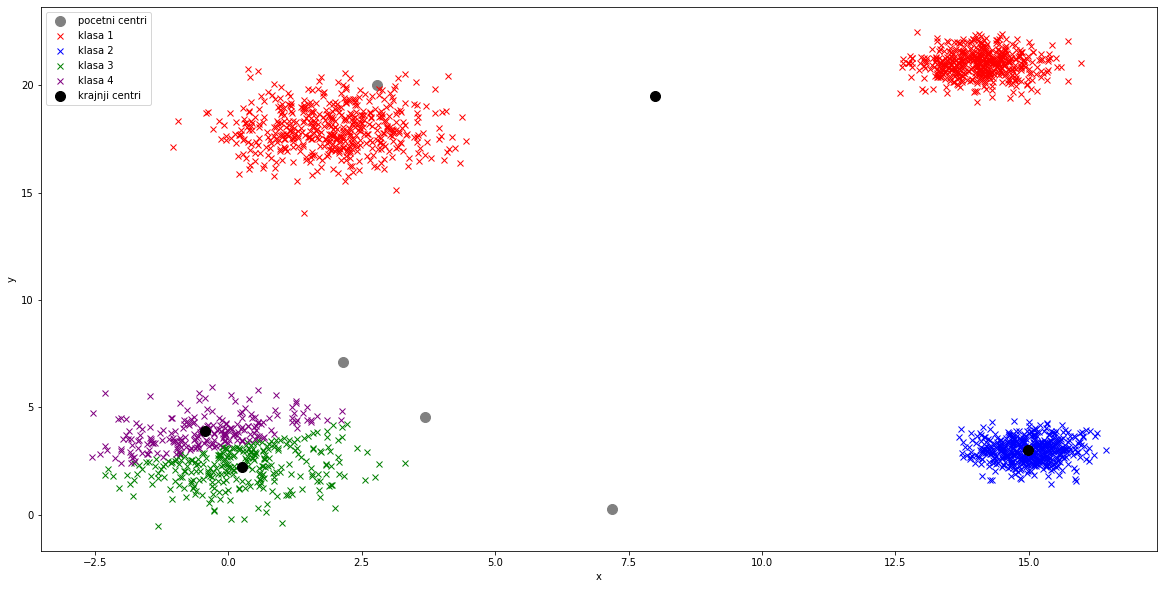

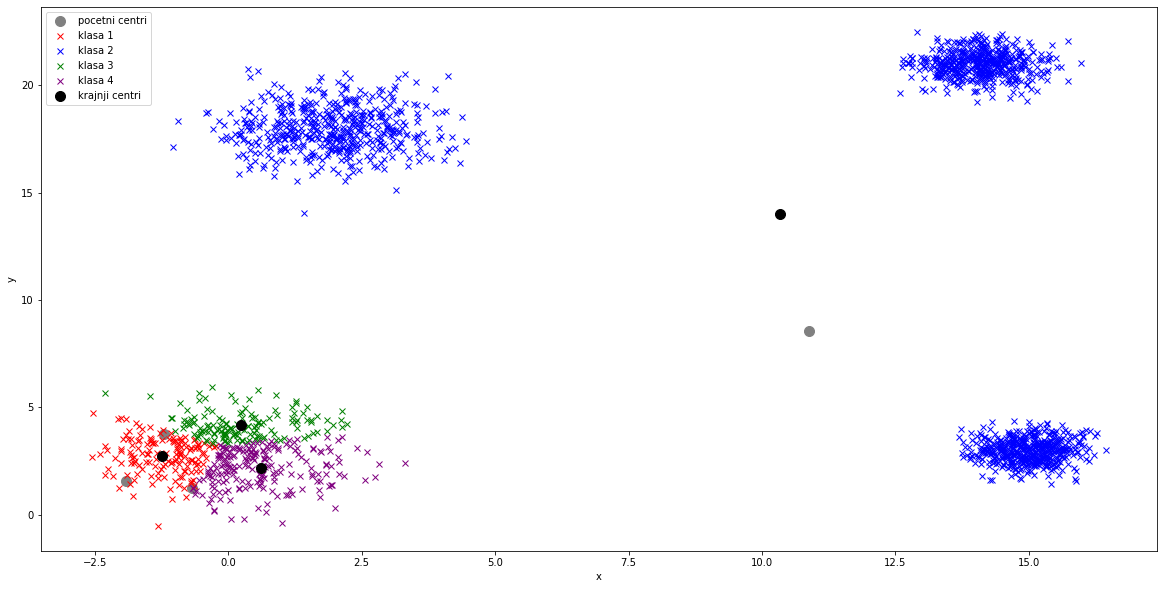

3 3


In [749]:
broj_iteracija1 = c_means(odbirci, 4, 3)
broj_iteracija2 = c_means(odbirci, 4, 3)
print(broj_iteracija1, broj_iteracija2)

Na prethodnim primerima može se videti da algoritam konvergira pre nego što dostigne željeni rezultat. Ovim se potvrđuje da c-means klasterizacija u velikom delu zavisi od početnog izbora centara klasa.

### d) Srednji broj potrebnih iteracija prilikom odlučivanja

In [750]:
def iteracije(odbirci, L):
    ukupan_broj_iteracija = 0
    for i in range(100):
        ukupan_broj_iteracija += c_means(odbirci, L, prikaz = False)

    ukupan_broj_iteracija /= 100
    return ukupan_broj_iteracija

In [751]:
ukupan_broj_iteracija = iteracije(odbirci, 4)
ukupan_broj_iteracija

5.46

Prosečan broj iteracija se može menjati u zavisnosti od pokretanja, kao posledica analize pod tačkom c) - nekada je potreban veći broj iteracija radi konvergencije.

### e) Analiza slučaja kada se apriorno ne poznaje broj klasa

U slučaju kada apriorno ne znamo broj klasa, potrebno je izvršiti klasterizaciju sa različitim pretpostavljenim brojevima klasa i analizirati rezultate.

In [752]:
L_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
broj_iteracija_list = []
for L in L_list:
    broj_iteracija_list.append(iteracije(odbirci, L))

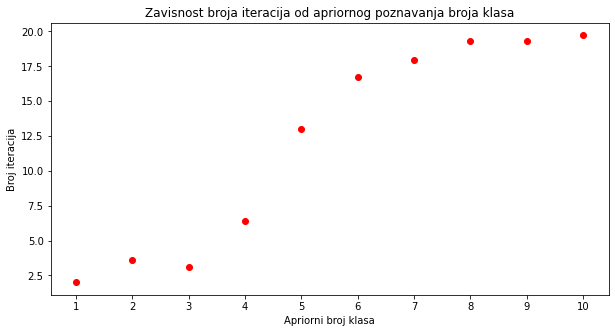

In [753]:
plt.figure(figsize=(10, 5))
plt.plot(L_list, broj_iteracija_list, 'o', color='red')
plt.xlabel('Apriorni broj klasa')
plt.ylabel('Broj iteracija')
plt.title('Zavisnost broja iteracija od apriornog poznavanja broja klasa')
plt.xticks(L_list)
plt.show()

Na grafiku iznad opaža se zavisnost prosečnog broja iteracija do konvergencije od apriornog poznavanja broja klasa. Vidi se da porastom broja klasa raste i broj iteracija zbog usložnjavanja algoritma.

## 2) Klasterizacija metodom maksimalne verodostojnosti

U ovom koraku izabrana je metoda maksimalne verodostojnosti. Za nju je potrebno napraviti slučajnu početnu klasterizaciju.

### Slučajna podela odbiraka u četiri klase

In [724]:
random_nums = np.random.rand(4*N)
X1_start, X2_start, X3_start, X4_start = [], [], [], [] 
for i in range(4*N):
    if random_nums[i] < 0.25:
        X1_start.append(odbirci[:, i])
    elif random_nums[i] < 0.5:
        X2_start.append(odbirci[:, i])
    elif random_nums[i] < 0.75:
        X3_start.append(odbirci[:, i])
    else:
        X4_start.append(odbirci[:, i])

In [725]:
X1_start_x = [x for x, y in X1_start]
X1_start_y = [y for x, y in X1_start]
X2_start_x = [x for x, y in X2_start]
X2_start_y = [y for x, y in X2_start]
X3_start_x = [x for x, y in X3_start]
X3_start_y = [y for x, y in X3_start]
X4_start_x = [x for x, y in X4_start]
X4_start_y = [y for x, y in X4_start]

In [726]:
X1_start = [[x, y] for x, y in X1_start]
X2_start = [[x, y] for x, y in X2_start]
X3_start = [[x, y] for x, y in X3_start]
X4_start = [[x, y] for x, y in X4_start]

Prikaz početne klasterizacije podataka.

Text(0, 0.5, 'y')

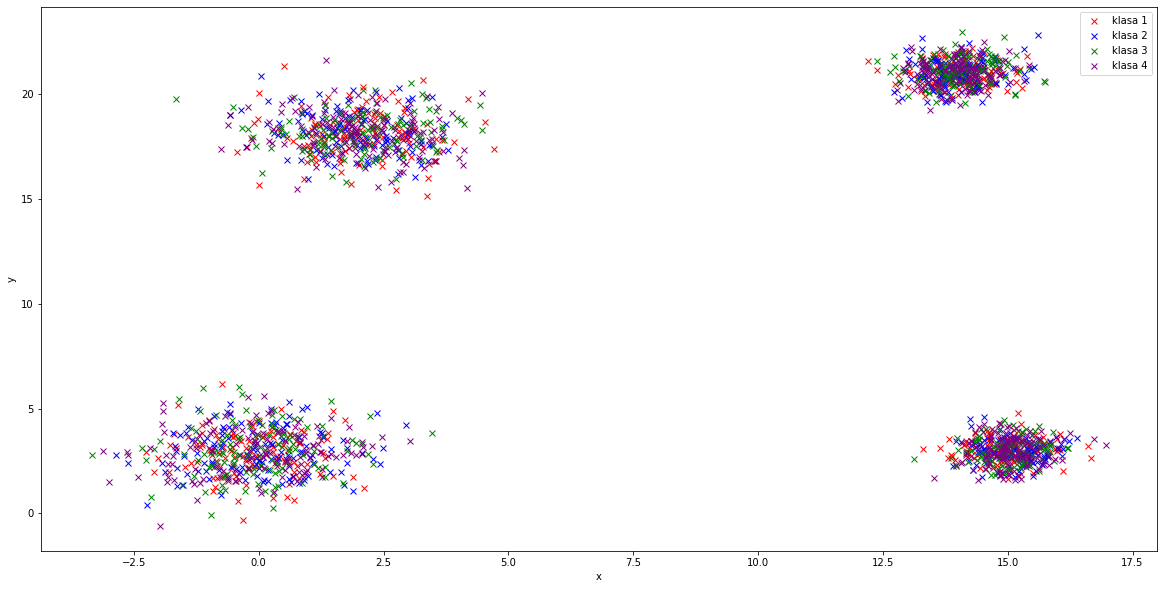

In [727]:
plt.figure(figsize=(20, 10))
plt.plot(X1_start_x, X1_start_y, 'x', label='klasa 1', color = 'red')
plt.plot(X2_start_x, X2_start_y, 'x', label='klasa 2', color='blue')
plt.plot(X3_start_x, X3_start_y, 'x', label='klasa 3', color='green')
plt.plot(X4_start_x, X4_start_y, 'x', label='klasa 4', color='purple')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

### Metod maksimalne verodostojnosti

Nakon inicijalne klasterizacije, proračunavaju se parametri:     
- apriorne verovatnoće pojave klasa (q1, q2, q3, q4)   
- vektori matematičkog očekivanja (M1, M2, M3, M4)          
- kovarijacione matrice (S1, S2, S3, S4)       
   
U svakoj novoj iteraciji se ponovo računaju parametri po formulama:    
$$q_i(x_j) = \frac{p_i\cdot f_i(x_j)}{f(x_j)} $$   
$$p_j = \frac{1}{N}\sum_{i=1}^{N}{q_{ij}}$$
$$M_j = \frac{1}{N_j}\sum_{i=1}^{N}{q_{ij}x_i}$$      
$$S_j = \frac{1}{N_j}\sum_{i=1}^{N}{q_{ij}(x_i-M_j)(x_i-M_j)^T}$$     
A odluka za kraj se donosi:
$$max|q_i^{(l)}(x_j) - q_i^{(l-1)}(x_j)| < T,$$
gde i = 1-L, j = 1-N, a T je prag odlučivanja.

In [820]:
def max_likelihood(odbirci_1, odbirci_2, odbirci_3, odbirci_4, max_iteracije = 1000, greska = 10e-16, prikaz = True):

    n1, n2, n3, n4 = len(odbirci_1), len(odbirci_2), len(odbirci_3), len(odbirci_4)   # broj odbiraka za svaku klasu
    n = n1 + n2 + n3 + n4       # ukupan broj odbiraka

    p1, p2, p3, p4 = n1/n, n2/n, n3/n, n4/n   # verovatnoce klasa

    M1, M2, M3, M4 = np.mean(odbirci_1, axis=0), np.mean(odbirci_2, axis=0), np.mean(odbirci_3, axis=0), np.mean(odbirci_4, axis=0)   # srednje vrednosti klasa

    # kovarijacione matrice klasa
    S1, S2, S3, S4 = np.cov(np.transpose(odbirci_1)), np.cov(np.transpose(odbirci_2)), np.cov(np.transpose(odbirci_3)), np.cov(np.transpose(odbirci_4))  

    f1, f2, f3, f4 = np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n)   # fgv za svaku klasu

    q1, q1_old = np.zeros(n), np.zeros(n)   # fgv za prvu klasu
    q2, q2_old = np.zeros(n), np.zeros(n)   # fgv za drugu klasu
    q3, q3_old = np.zeros(n), np.zeros(n)   # fgv za trecu klasu
    q4, q4_old = np.zeros(n), np.zeros(n)   # fgv za cetvrtu klasu
    
    odbirci = np.concatenate((odbirci_1, odbirci_2, odbirci_3, odbirci_4), axis=0)   # matrica odbiraka
    broj_iteracija = 0  # broj iteracija
    f = np.zeros(n)     # ukupna fgv

    while True:

        broj_iteracija += 1  # uvecanje broja iteracija

        # racunanje fgv za svaku klasu
        for i in range(n):
            odbirak = odbirci[i]
            f1[i] = np.exp(-0.5 * np.dot(np.dot((odbirak - M1), np.linalg.inv(S1)), (odbirak - M1).T)) / (2 * np.pi * np.sqrt(np.linalg.det(S1)))
            f2[i] = np.exp(-0.5 * np.dot(np.dot((odbirak - M2), np.linalg.inv(S2)), (odbirak - M2).T)) / (2 * np.pi * np.sqrt(np.linalg.det(S2)))
            f3[i] = np.exp(-0.5 * np.dot(np.dot((odbirak - M3), np.linalg.inv(S3)), (odbirak - M3).T)) / (2 * np.pi * np.sqrt(np.linalg.det(S3)))
            f4[i] = np.exp(-0.5 * np.dot(np.dot((odbirak - M4), np.linalg.inv(S4)), (odbirak - M4).T)) / (2 * np.pi * np.sqrt(np.linalg.det(S4)))
            
            f[i] = p1*f1[i] + p2*f2[i] + p3*f3[i] + p4*f4[i]    # ukupna fgv

            # racunanje aposteriorne verovatnoce za svaku klasu
            q1[i] = p1*f1[i]/f[i]
            q2[i] = p2*f2[i]/f[i]
            q3[i] = p3*f3[i]/f[i]
            q4[i] = p4*f4[i]/f[i]

        # racunanje kriterijumske funkcije za zaustavljanje
        d = np.max([np.max(abs(q1-q1_old)), np.max(abs(q2-q2_old)), np.max(abs(q2-q2_old)), np.max(abs(q2-q2_old))], axis=0)

        # provera da li je ispunjen neki od uslova zaustavljanja
        if d < greska or broj_iteracija > max_iteracije :
            break

        # azuriranje aposteriornih verovatnoca
        q1_old, q2_old, q3_old, q4_old = q1.copy(), q2.copy(), q3.copy(), q4.copy()

        # azuriranje verovatnoca klasa
        p1, p2, p3, p4 = np.sum(q1)/len(q1), np.sum(q2)/len(q2), np.sum(q3)/len(q3), np.sum(q4)/len(q4)        

        # azuriranje broja odbiraka za svake klase
        n1, n2, n3, n4 = p1*n, p2*n, p3*n, p4*n
        
        # azuriranje vektora ocekivanja
        M1, M2, M3, M4 = np.zeros_like(M1), np.zeros_like(M2), np.zeros_like(M3), np.zeros_like(M4)

        for i in range(n):
            M1 += q1[i]*odbirci[i]/n1
            M2 += q2[i]*odbirci[i]/n2
            M3 += q3[i]*odbirci[i]/n3
            M4 += q4[i]*odbirci[i]/n4

        # azuriranje kovarijacionih matrica
        S1, S2, S3, S4 = np.zeros_like(S1), np.zeros_like(S2), np.zeros_like(S3), np.zeros_like(S4)

        for i in range(n):
            s1_delta = q1[i] * np.outer((odbirci[i] - M1), (odbirci[i] - M1))
            S1 += s1_delta/n1
          
            s2_delta = q2[i] * np.outer((odbirci[i] - M2), (odbirci[i] - M2))
            S2 += s2_delta/n2

            s3_delta = q3[i] * np.outer((odbirci[i] - M3), (odbirci[i] - M3))
            S3 += s3_delta/n3

            s4_delta = q4[i] * np.outer((odbirci[i] - M4), (odbirci[i] - M4))
            S4 += s4_delta/n4


    # podela odbiraka u odgovarajuce klase nakon zavrsene klasterizacije
    data1, data2, data3, data4 = [], [], [], []
    
    for i in range(n):
        q = sorted([q1[i], q2[i], q3[i], q4[i]], reverse=True)
        if q[0] == q1[i]:
            data1.append(odbirci[i])
        elif q[0] == q2[i]:
            data2.append(odbirci[i])
        elif q[0] == q3[i]:
            data3.append(odbirci[i])
        elif q[0] == q4[i]:
            data4.append(odbirci[i])

    # prikaz 
    if prikaz:
        plt.figure(figsize=(20, 10))
        if len(data1) != 0:
            data1 = np.array(data1).T
            plt.plot(data1[0, :], data1[1, :], 'x', label='klasa 1', color = 'red')
        if len(data2) != 0:
            data2 = np.array(data2).T
            plt.plot(data2[0, :], data2[1, :], 'x', label='klasa 2', color='blue')
        if len(data3) != 0:
            data3 = np.array(data3).T
            plt.plot(data3[0, :], data3[1, :], 'x', label='klasa 3', color='green')
        if len(data4) != 0:
            data4 = np.array(data4).T
            plt.plot(data4[0, :], data4[1, :], 'x', label='klasa 4', color='purple')
        plt.legend()

    return data1, data2, data3, data4, broj_iteracija


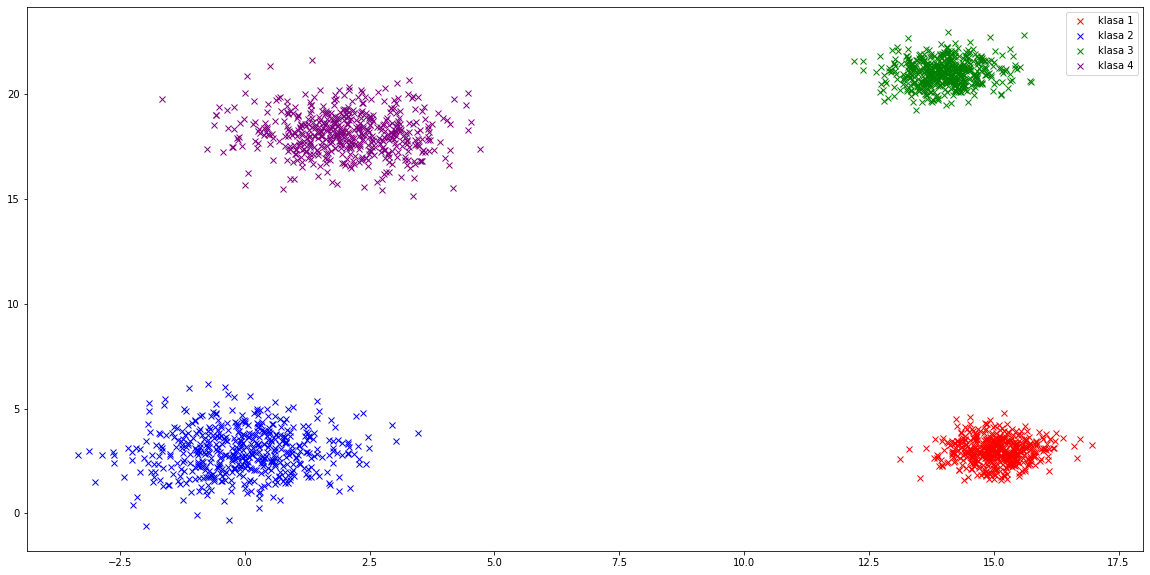

In [772]:
X1_new, X2_new, X3_new, X4_new, broj_iteracija = max_likelihood(X1_start, X2_start, X3_start, X4_start)

### Prosečan broj iteracija

In [821]:
def iteracije():
    ukupan_broj_iteracija = 0
    for i in range(10):
        random_nums = np.random.rand(4*N)
        X1_start, X2_start, X3_start, X4_start = [], [], [], [] 
        for i in range(4*N):
            if random_nums[i] < 0.25:
                X1_start.append(odbirci[:, i])
            elif random_nums[i] < 0.5:
                X2_start.append(odbirci[:, i])
            elif random_nums[i] < 0.75:
                X3_start.append(odbirci[:, i])
            else:
                X4_start.append(odbirci[:, i])

        X1_start = [[x, y] for x, y in X1_start]
        X2_start = [[x, y] for x, y in X2_start]
        X3_start = [[x, y] for x, y in X3_start]
        X4_start = [[x, y] for x, y in X4_start]
        data1, data2, data3, data4, broj_iteracija = max_likelihood(X1_start, X2_start, X3_start, X4_start, prikaz=False)
        ukupan_broj_iteracija += broj_iteracija

    ukupan_broj_iteracija /= 10

    return ukupan_broj_iteracija

In [822]:
iteracije()

63.5

Zaključujemo da je prosečan broj iteracija veći od prethodnih metoda, ali da su pojave problema ili pogrešne konvergencije manji.

### Analiza osetljivosti algoritma na početnu klasterizaciju

Kako bi se testirala osetljivost algoritma na početnu klasterizaciju ograničen je dozvoljeni broj iteracija (pošto su klase već dovoljno separabilne, pa nije potrebno previše odbiraka da bi došlo do konvergencije). Posmatrani su rezultati za različita pokretanja.

In [779]:
def podela_odbiraka():
    
    random_nums = np.random.rand(4*N)
    X1_start, X2_start, X3_start, X4_start = [], [], [], [] 
    for i in range(4*N):
        if random_nums[i] < 0.25:
            X1_start.append(odbirci[:, i])
        elif random_nums[i] < 0.5:
            X2_start.append(odbirci[:, i])
        elif random_nums[i] < 0.75:
            X3_start.append(odbirci[:, i])
        else:
            X4_start.append(odbirci[:, i])

    X1_start = [[x, y] for x, y in X1_start]
    X2_start = [[x, y] for x, y in X2_start]
    X3_start = [[x, y] for x, y in X3_start]
    X4_start = [[x, y] for x, y in X4_start]

    return X1_start, X2_start, X3_start, X4_start

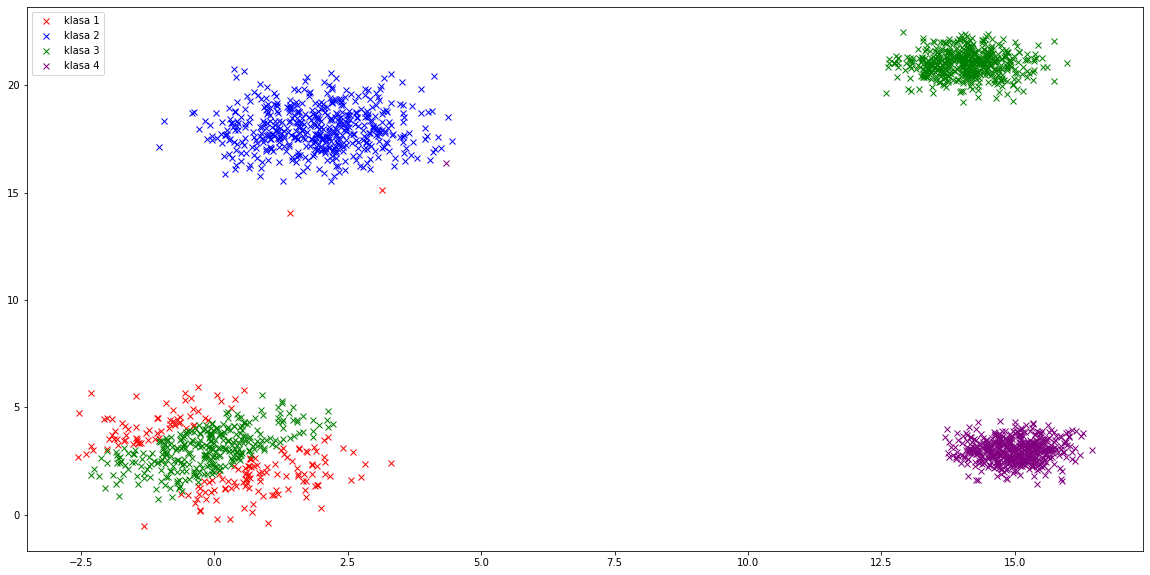

In [784]:
X1_start, X2_start, X3_start, X4_start = podela_odbiraka()
X1_new, X2_new, X3_new, X4_new, broj_iteracija = max_likelihood(X1_start, X2_start, X3_start, X4_start, max_iteracije= 20)

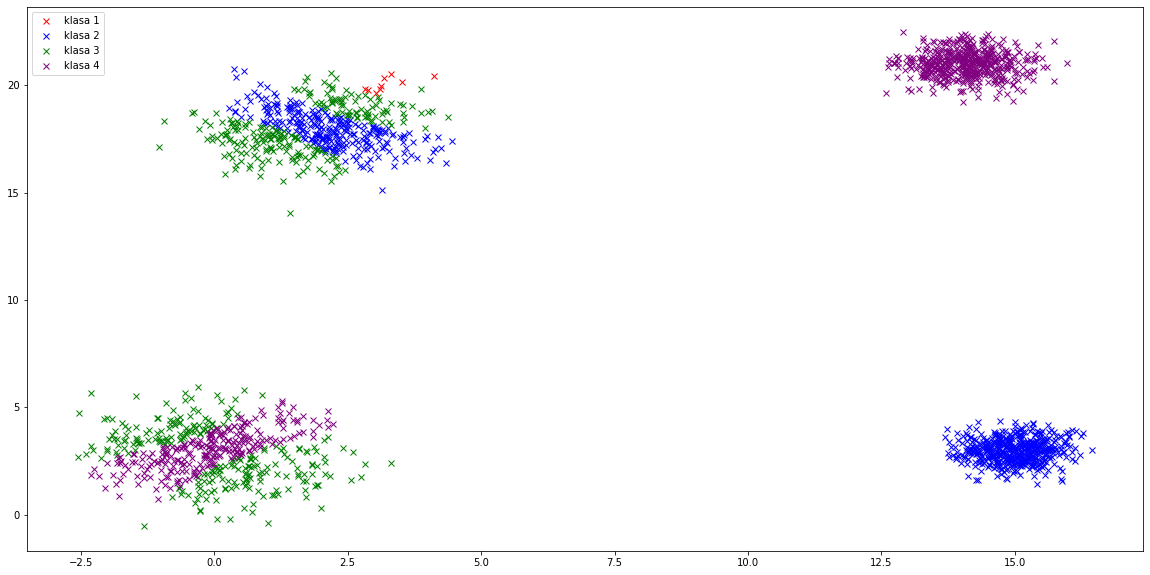

In [785]:
X1_start, X2_start, X3_start, X4_start = podela_odbiraka()
X1_new, X2_new, X3_new, X4_new, broj_iteracija = max_likelihood(X1_start, X2_start, X3_start, X4_start, max_iteracije= 20)

Anlizom prethodnog koraka, vidimo da se dešava da nekada klasterizacija ne uspeva da konvergira u određenom broju koraka/iteracija. U ovom slučaju, maksimalan broj je podešen na 20.

## 3) Metod maksimalne verodostojnosti nelinearno separabilnih klasa

### Generisanje nelinearno separabilnih kalsa

In [754]:
N = 500  # broj odbiraka

# generisanje odbiraka za prvu klasu
fi1 = [random.uniform(0, 2*np.pi) for i in range(N)]
ro1 = [random.uniform(0, 1) for i in range(N)]
X1 = np.zeros((2, N))
X1[0, :] = ro1*np.cos(fi1)
X1[1, :] = ro1*np.sin(fi1)

# generisanje odbiraka za drugu klasu
fi2 = [random.uniform(0, 2*np.pi) for i in range(N)]
ro2 = [random.uniform(0, 1)+3 for i in range(N)]
X2 = np.zeros((2, N))
X2[0, :] = ro2*np.cos(fi2)
X2[1, :] = ro2*np.sin(fi2)

Prikaz generisanih odbiraka.

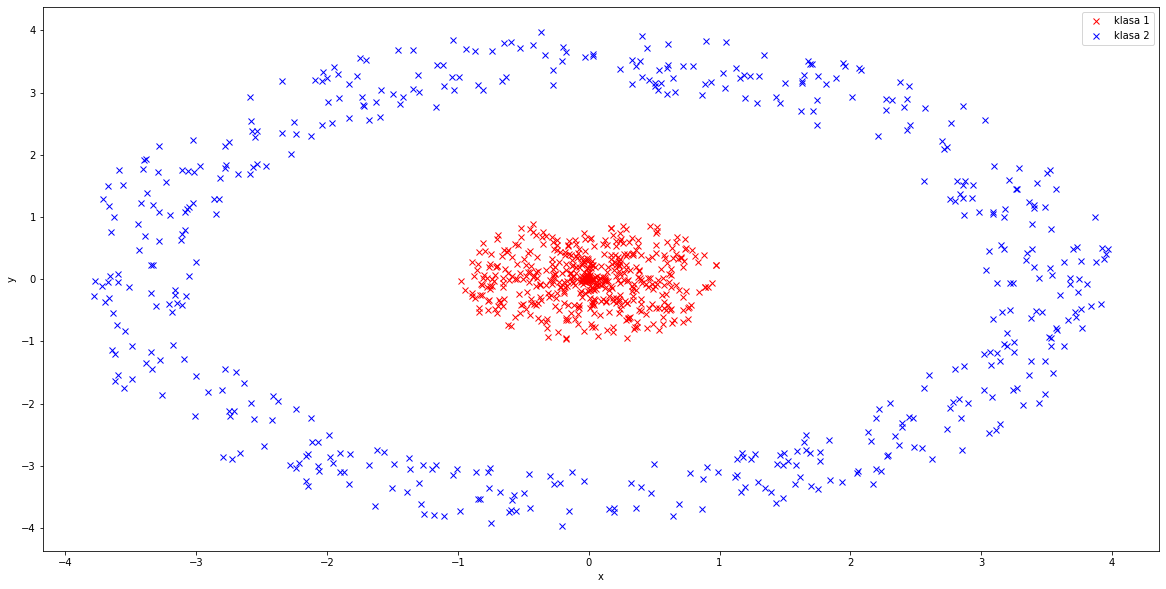

In [755]:
plt.figure(figsize=(20, 10))
plt.plot(X1[0, :], X1[1, :], 'x', label='klasa 1', color = 'red')
plt.plot(X2[0, :], X2[1, :], 'x', label='klasa 2', color='blue')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Klasterizacija

Inicijalna podela podataka u dve klase.

In [792]:
X = []
Y = []
XY = np.concatenate((X1, X2), axis=1) # svi odbirci 
varijansa = np.var(XY, axis=0)        # varijansa svakog podatka 

In [793]:
# inicijalna podela podataka na dve klase
for i in range(2*N):
    if varijansa[i] < 1:
        X.append(XY[:, i])
    else:
        Y.append(XY[:, i])

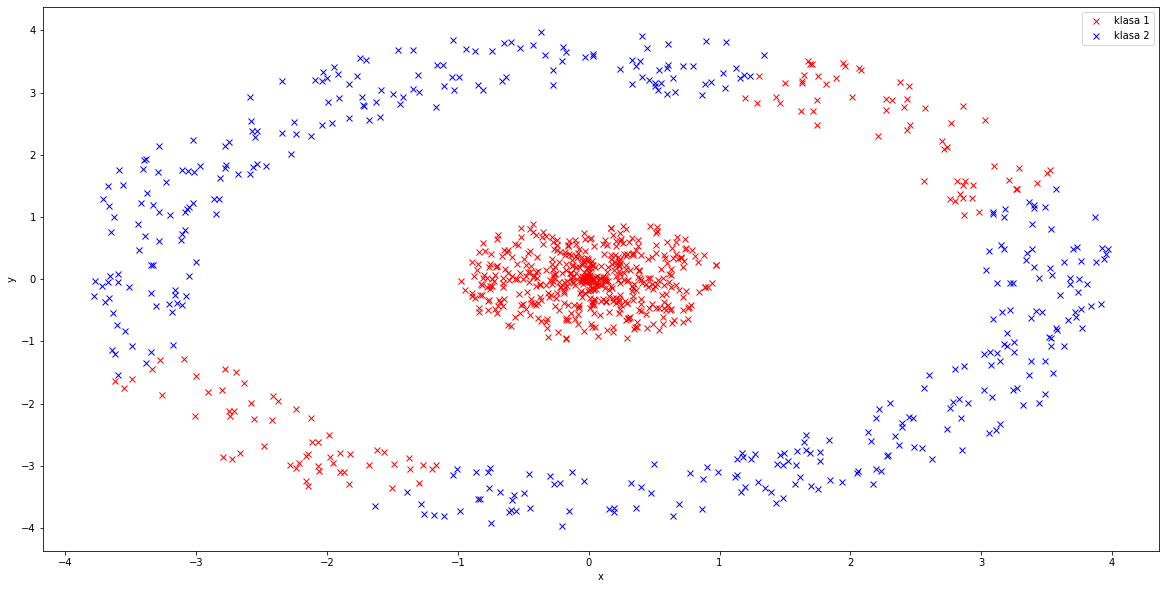

In [794]:
# prikaz
plt.figure(figsize=(20, 10))
X = np.array(X).T
Y = np.array(Y).T
plt.plot(X[0, :], X[1, :], 'x', label='klasa 1', color = 'red')
plt.plot(Y[0, :], Y[1, :], 'x', label='klasa 2', color='blue')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Određivanje početnih parametra klasterizacije.

In [796]:
N1 = len(X[0, :])   # broj odbiraka prve klase
N2 = len(Y[0, :])   # broj odbiraka druge klase
M1 = np.mean(X, axis=1) # vektor matematickog ocekivanja 1.
M2 = np.mean(Y, axis=1) # vektor matematickog ocekivanja 2.
S1 = np.cov(X)      # kovarijaciona matrica prve klase
S2 = np.cov(Y)      # kovarijaciona matrica druge klase
P1 = N1/(N1+N2)     # verovatnoca 1
P2 = N2/(N1+N2)     # verovatnoca 2

l = 1               # broj iteracija
max_iters = 100     # maksimalni brojn iteracija
possible = 1        # omogucava prekidanje iteriranja
XYiter = np.concatenate((X, Y), axis=1)     # svi podaci

Klasterizacija.

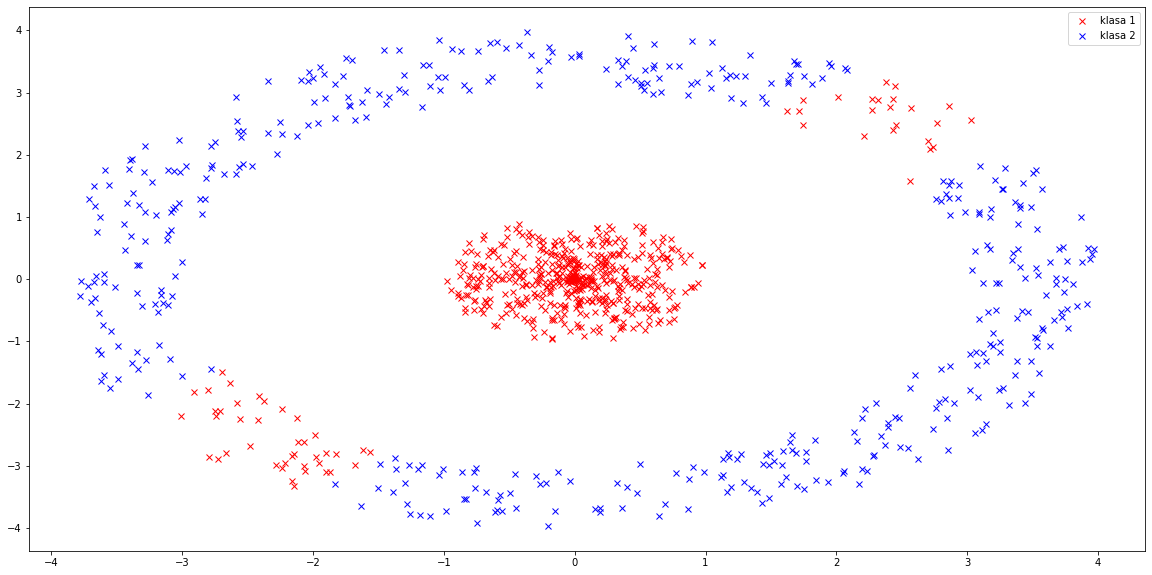

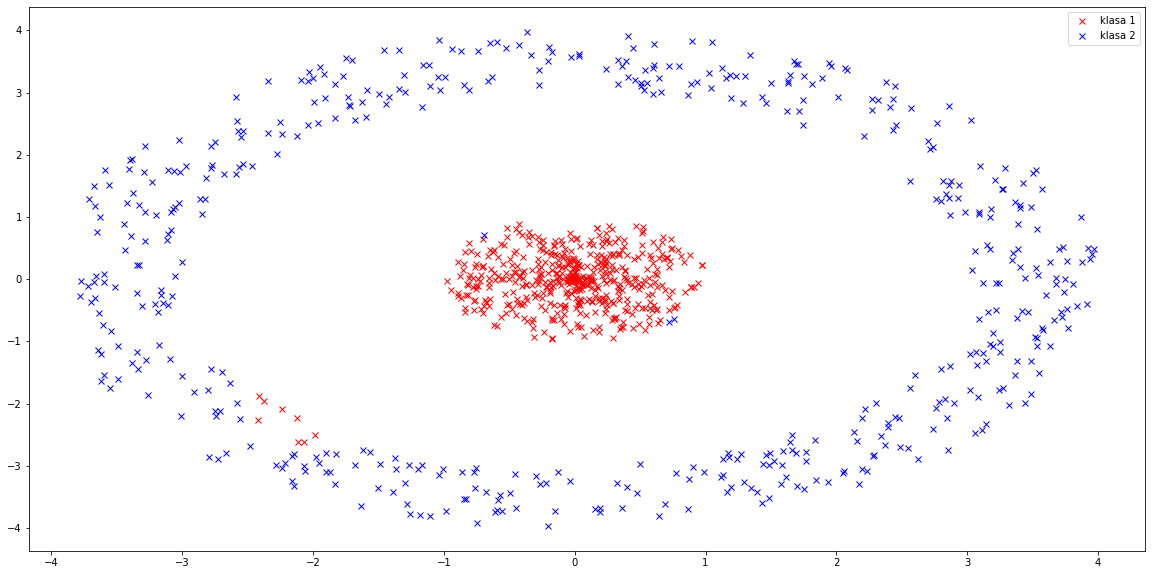

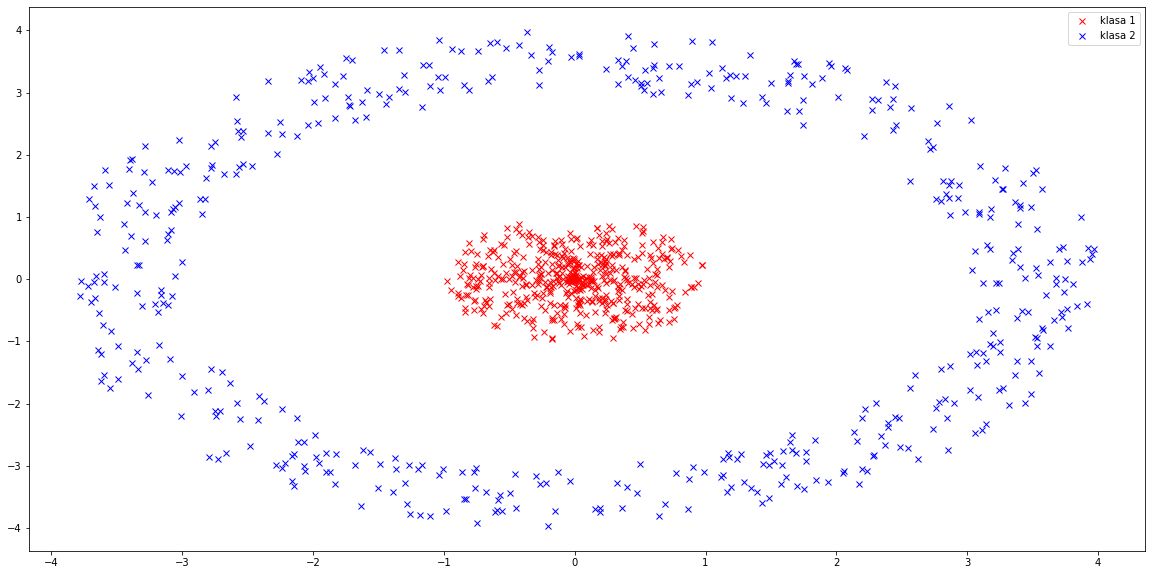

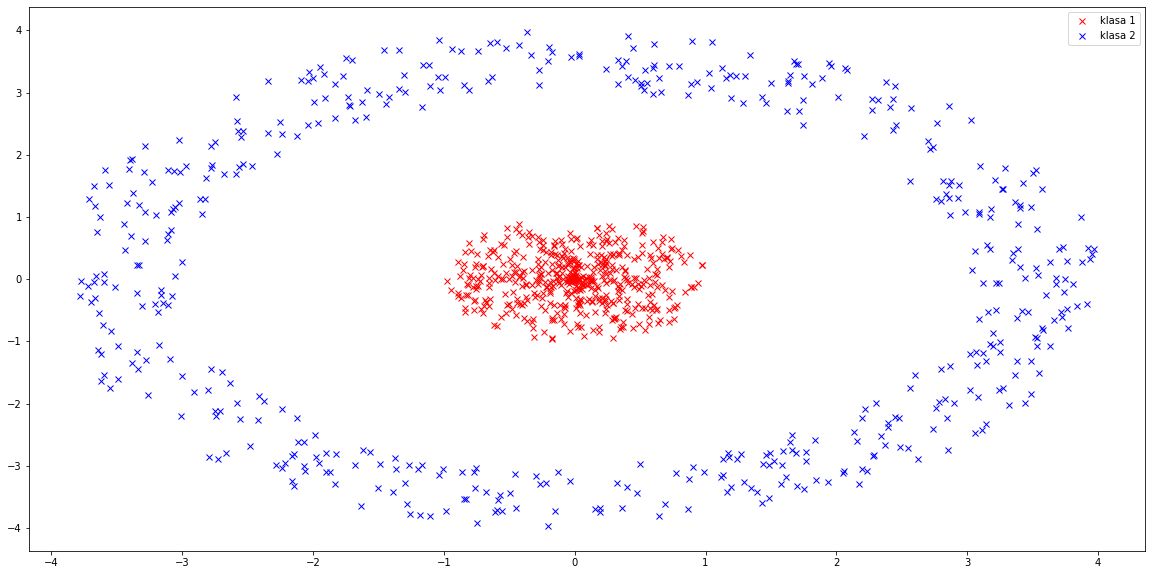

In [797]:
while max_iters > 1 and possible:

    possible = 0
    Xiter = []
    Yiter = []

    for i in range(N1+N2):
        # racunanje distanci 1 i 2
        d1 = 0.5*np.transpose(np.subtract(XYiter[:, i], M1)) @ np.linalg.inv(S1) @ np.subtract(XYiter[:, i], M1) + 0.5*np.log(np.linalg.det(S1)) - 0.5*np.log(P1)
        d2 = 0.5*np.transpose(np.subtract(XYiter[:, i], M2)) @ np.linalg.inv(S2) @ np.subtract(XYiter[:, i], M2) + 0.5*np.log(np.linalg.det(S2)) - 0.5*np.log(P2)
        if d1 < d2:
            # dodavanje odbirka u adekvatnu klasu
            Xiter.append(XYiter[:, i])
            # ukoliko je klasa puna ne izvrsava se dodavanje
            if i>=N1:
                possible = 1
        else:
            # dodavanje odbirka u adekvatnu klasu
            Yiter.append(XYiter[:, i])
            # ukoliko je klasa puna ne izvrsava se dodavanje
            if i<N1:
                possible = 1

    # formiranje novih klasa
    X = Xiter
    Y = Yiter
    X = np.array(X).T
    Y = np.array(Y).T
    XYiter = np.concatenate((X, Y), axis=1)

    # prikaz u svakoj iteraciji
    plt.figure(figsize=(20, 10))
    plt.plot(X[0, :], X[1, :], 'x', label='klasa 1', color = 'red')
    plt.plot(Y[0, :], Y[1, :], 'x', label='klasa 2', color='blue')
    plt.legend()

    # racunanje novih parametara klase
    N1 = len(X[0, :])
    N2 = len(Y[0, :])
    M1 = np.mean(X, axis=1)
    M2 = np.mean(Y, axis=1)
    S1 = np.cov(X)
    S2 = np.cov(Y)
    P1 = N1/(N1+N2)
    P2 = N2/(N1+N2)

    l += 1  # uvecavanje broja iteracija


Nakon što dođe do dve uzastopno iste preraspodele odbiraka, prekida se iteriranje. Vidimo da ovakvom prvobitnom preraspodelom (inicijalnom klasterizacijom) prilično brzo konvergiramo ka rešenju.

### Prosečan broj iteracija

In [805]:
def klasterizacija(X, Y):

    N1 = len(X[0, :])   # broj odbiraka prve klase
    N2 = len(Y[0, :])   # broj odbiraka druge klase
    M1 = np.mean(X, axis=1) # vektor matematickog ocekivanja 1.
    M2 = np.mean(Y, axis=1) # vektor matematickog ocekivanja 2.
    S1 = np.cov(X)      # kovarijaciona matrica prve klase
    S2 = np.cov(Y)      # kovarijaciona matrica druge klase
    P1 = N1/(N1+N2)     # verovatnoca 1
    P2 = N2/(N1+N2)     # verovatnoca 2

    l = 1               # broj iteracija
    max_iters = 100     # maksimalni brojn iteracija
    possible = 1        # omogucava prekidanje iteriranja
    XYiter = np.concatenate((X, Y), axis=1)     # svi podaci

    while max_iters > 1 and possible:

        possible = 0
        Xiter = []
        Yiter = []

        for i in range(N1+N2):
            # racunanje distanci 1 i 2
            d1 = 0.5*np.transpose(np.subtract(XYiter[:, i], M1)) @ np.linalg.inv(S1) @ np.subtract(XYiter[:, i], M1) + 0.5*np.log(np.linalg.det(S1)) - 0.5*np.log(P1)
            d2 = 0.5*np.transpose(np.subtract(XYiter[:, i], M2)) @ np.linalg.inv(S2) @ np.subtract(XYiter[:, i], M2) + 0.5*np.log(np.linalg.det(S2)) - 0.5*np.log(P2)
            if d1 < d2:
                # dodavanje odbirka u adekvatnu klasu
                Xiter.append(XYiter[:, i])
                # ukoliko je klasa puna ne izvrsava se dodavanje
                if i>=N1:
                    possible = 1
            else:
                # dodavanje odbirka u adekvatnu klasu
                Yiter.append(XYiter[:, i])
                # ukoliko je klasa puna ne izvrsava se dodavanje
                if i<N1:
                    possible = 1

        # formiranje novih klasa
        X = Xiter
        Y = Yiter
        X = np.array(X).T
        Y = np.array(Y).T
        XYiter = np.concatenate((X, Y), axis=1)

        # racunanje novih parametara klase
        N1 = len(X[0, :])
        N2 = len(Y[0, :])
        M1 = np.mean(X, axis=1)
        M2 = np.mean(Y, axis=1)
        S1 = np.cov(X)
        S2 = np.cov(Y)
        P1 = N1/(N1+N2)
        P2 = N2/(N1+N2)

        l += 1  # uvecavanje broja iteracija

    return l

In [813]:
def iteracije():
    ukupan_broj_iteracija = 0
    for i in range(10):
        X = []
        Y = []
        XY = np.concatenate((X1, X2), axis=1) # svi odbirci 

        # inicijalna podela podataka na dve klase
        for i in range(2*N):
            rand_num = random.uniform(0, 1)
            if rand_num < 0.5:
                X.append(XY[:, i])
            else:
                Y.append(XY[:, i])

        X = np.array(X).T
        Y = np.array(Y).T
        ukupan_broj_iteracija += klasterizacija(X,Y)

    ukupan_broj_iteracija /= 10

    return ukupan_broj_iteracija

In [815]:
ukupan_broj_iteracija = iteracije()
ukupan_broj_iteracija

10.7

### Analiza rada kada nam nije poznat broj kalsa

Ukoliko ne znamo inicijalni broj klasa, rezultat pod pretpostavkom da imamo 3 izgleda ovako:

In [764]:
# preraspodela odbiraka
X, Y, Z = [], [], []
XY = np.concatenate((X1, X2), axis=1)
varijansa = np.var(XY, axis=0)

for i in range(2*N):
    p = random.uniform(0, 1)
    if p < 0.33:
        X.append(XY[:, i])
    elif p < 0.66:
        Y.append(XY[:, i])
    else:
        Z.append(XY[:, i])

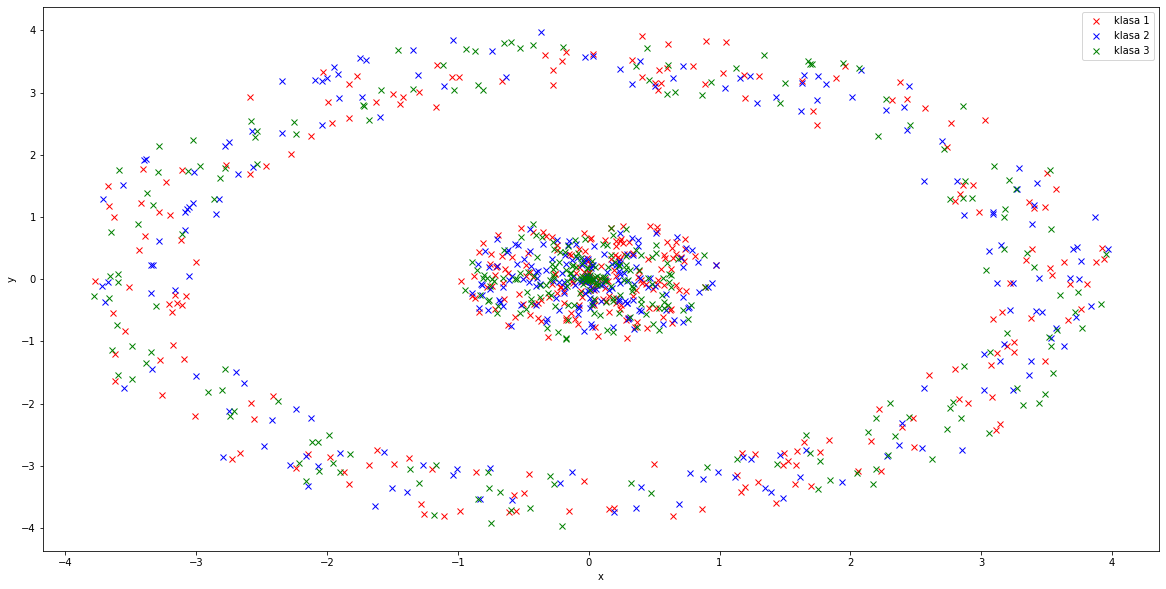

In [765]:
# prikaz pocetne klasterizacije
plt.figure(figsize=(20, 10))
X = np.array(X).T
Y = np.array(Y).T
Z = np.array(Z).T
plt.plot(X[0, :], X[1, :], 'x', label='klasa 1', color = 'red')
plt.plot(Y[0, :], Y[1, :], 'x', label='klasa 2', color='blue')
plt.plot(Z[0, :], Z[1, :], 'x', label='klasa 3', color='green')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Određivanje parametara početne klasterizacije.

In [766]:
N1 = len(X[0, :])
N2 = len(Y[0, :])
N3 = len(Z[0, :])
M1 = np.mean(X, axis=1)
M2 = np.mean(Y, axis=1)
M3 = np.mean(Z, axis=1)
S1 = np.cov(X)
S2 = np.cov(Y)
S3 = np.cov(Z)
P1 = N1/(N1+N2+N3)
P2 = N2/(N1+N2+N3)
P3 = N3/(N1+N2+N3)

max_iters = 100
possible = 1
XYiter = np.concatenate((X, Y, Z), axis=1)

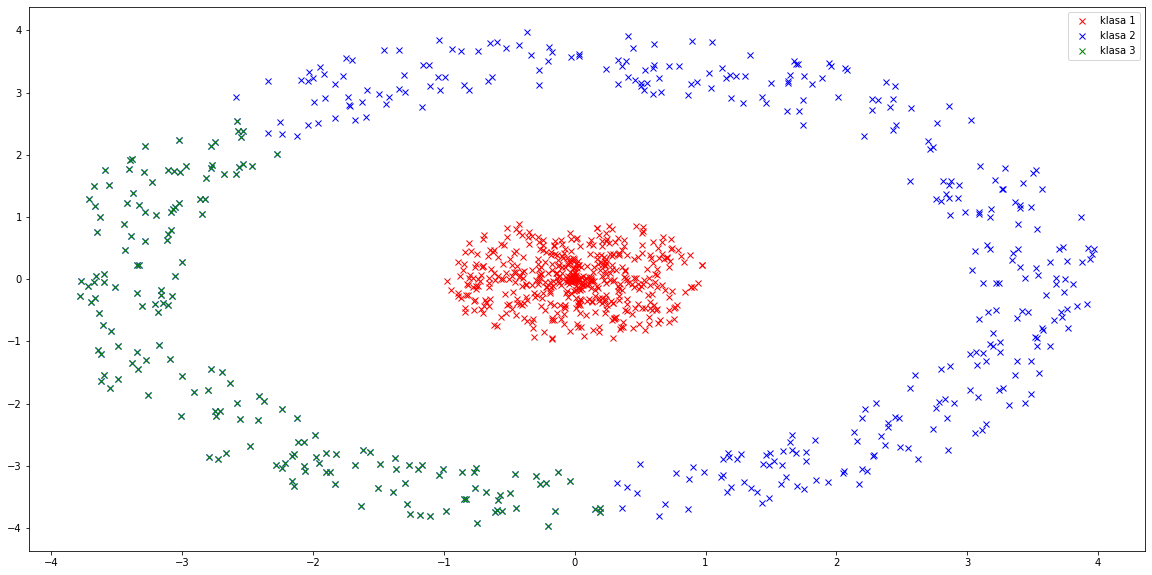

In [799]:
while max_iters>1 and possible:

    possible = 0
    Xiter = []
    Yiter = []
    Ziter = []

    for i in range(N1+N2+N3):
        d1 = 0.5*np.transpose(np.subtract(XYiter[:, i], M1)) @ np.linalg.inv(S1) @ np.subtract(XYiter[:, i], M1) + 0.5*np.log(np.linalg.det(S1)) - 0.5*np.log(P1)
        d2 = 0.5*np.transpose(np.subtract(XYiter[:, i], M2)) @ np.linalg.inv(S2) @ np.subtract(XYiter[:, i], M2) + 0.5*np.log(np.linalg.det(S2)) - 0.5*np.log(P2)
        d3 = 0.5*np.transpose(np.subtract(XYiter[:, i], M3)) @ np.linalg.inv(S3) @ np.subtract(XYiter[:, i], M3) + 0.5*np.log(np.linalg.det(S3)) - 0.5*np.log(P3)
        if d1<d2 and d1<d3:
            Xiter.append(XYiter[:, i])
            if i>=N1:
                possible = 1
        elif d2<d3:
            Yiter.append(XYiter[:, i])
            if i<N1 or i>=N1+N2:
                possible = 1
        else:
            Ziter.append(XYiter[:, i])
            if i<N1+N2:
                possible = 1

    X = Xiter
    Y = Yiter
    Z = Ziter
    X = np.array(X).T
    Y = np.array(Y).T
    Z = np.array(Z).T
    XYiter = np.concatenate((X, Y, Z), axis=1)

    N1 = len(X[0, :])
    N2 = len(Y[0, :])
    N3 = len(Z[0, :])
    M1 = np.mean(X, axis=1)
    M2 = np.mean(Y, axis=1)
    M3 = np.mean(Z, axis=1)
    S1 = np.cov(X)
    S2 = np.cov(Y)
    S3 = np.cov(Z)
    P1 = N1/(N1+N2+N3)
    P2 = N2/(N1+N2+N3)
    P3 = N3/(N1+N2+N3)

plt.figure(figsize=(20, 10))
plt.plot(X[0, :], X[1, :], 'x', label='klasa 1', color = 'red')
plt.plot(Y[0, :], Y[1, :], 'x', label='klasa 2', color='blue')
plt.plot(Z[0, :], Z[1, :], 'x', label='klasa 3', color='green')
plt.legend()

Primećujemo da se nakon klasterizacije odbiraka na 3 različite klase velika rasipana klasa deli na dve manje (centi klastera se odvajaju na dve različite strane).